## Using the 5x5x5 unit bin size (used in the paper by Lin et.al) as a single feature to judge how well this one feature fits as compared to our models

In [24]:
# Find the fraction of pixels within the 5 unit distance from each of L,a and b.

In [2]:
# Initialize these:
typeImg = "top" # photo/ cartoon/ top"
numImg = "50" # 5 or 50
sz = 100

In [3]:
# # Include imports
import glob
from skimage.transform import resize
from skimage.io import imread, imsave, imshow
import os
import pandas as pd
import numpy as np
import skimage.color as skcolor
import matplotlib.pyplot as plt

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import time

In [4]:
colNames = ["col_"+str(i) for i in range(58)] 
allConcepts = ['mango','watermelon','honeydew','cantaloupe','grapefruit','strawberry','raspberry','blueberry','avocado','orange','lime','lemon']

# Read data
# Get the color ratings data -From file data_clean.csv
data = pd.read_csv("data_clean.csv",names = colNames)

# Get the LAB coordinates of colors from file LabOrig.csv
#colorData = pd.read_csv("LabOrig.csv",header=None)
colorData = pd.read_csv("Lab.csv",header=None)
colorDataRGB = pd.read_csv("RGB.csv",header=None)

category = pd.read_csv("Category.csv",header=None)
path = "E:/GitRepo/Color-Concept-Associaitons-using-Google-Images/downloads"
# if not os.path.exists( path + "/trainResized" ):
#    os.makedirs( path + "/trainResized/" )


In [5]:
# Count total number of images
count = 0
for i in allConcepts:
    trainFiles = glob.glob( path + "/" +typeImg +"/" +i+"/*.*" )
    count = count + len(trainFiles)
    #print(count)
print("Category: ",typeImg)
print("Total images : ",count)

Category:  top
Total images :  600


In [6]:
import matlab.engine
category = pd.read_csv("Category.csv",header=None)

# def getCategoriesMatrix(imageFileName,sz):
#     ## Get total pixel counts of all 11 categories for this imageFile
#     eng = matlab.engine.start_matlab()
#     imageCat = np.array(eng.getCategories(imageFileName,sz))
#     eng.quit()
#      # imageCat : sz x sz matrix where each pixel has its category
#     return imageCat

# def getSegmentedImage(imageFileName,sz): # Returns segmented pixels in LAB and its corresponding color category.
#     eng = matlab.engine.start_matlab()
#     segImg, segImgCat = eng.activeContourSegmentation(imageFileName,sz, nargout=2)
#     eng.quit()
#     segImg = np.array(segImg)/255;
#     segImg = skcolor.rgb2lab(segImg)
#     segImgCat = np.array(segImgCat)
#     return segImg, segImgCat


In [7]:
category.shape

(58, 1)

In [8]:
numFt = 1
X = np.zeros((count*58,numFt+1) )  # +1 for label #Number of features [] # Feature Vector -- 58N rows
init = time.time()
rowNum = -1
strtInd = []  # To keep track of the starting indices of fruits in the feature matrix
cvInd = 1 
counter = 0
sz = 100    # Size of image: 100 by 100


for conceptNum,concept in enumerate(allConcepts):
    t0 = time.time()
    print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>\n",conceptNum+1,": Concept : ",concept)
    # Get label for corresponding fruit (for given color)
    #label = data.loc[conceptNum]['col_'+str(color)]
    ct = 0    # Keeps track of images inside a category
    strtInd.append(counter)
    trainFiles = glob.glob( path + "/" +typeImg +"/" +concept+"/*.*" )
    print("\tTotal number of images for ",concept," : ",len(trainFiles))
    t = []
    for m, nameFile in enumerate(trainFiles):
        t1 = time.time()
        #print("\nReading file ......")
        ct = ct + 1
        
        image = imread( nameFile )
        imageResized = resize( image, (sz,sz),anti_aliasing=True,mode='reflect')
        img = imageResized
        # Convert the pixels in  image to LAB space
        imgLAB = skcolor.rgb2lab(img)
        
        L =  imgLAB[:,:,0]
        a =  imgLAB[:,:,1]
        b =  imgLAB[:,:,2]
        
        LTemp = L.flatten()
        aTemp = a.flatten()
        bTemp = b.flatten()
        
        for color in range(58):
            rowNum+=1
            counter += 1
            colCt = 0
            colorLAB = np.array(colorData.loc[color])   #get LAB values for specific color
            

            L_diff = np.abs(LTemp - colorLAB[0])
            a_diff = np.abs(aTemp - colorLAB[1])
            b_diff = np.abs(bTemp - colorLAB[2])
            
            pixels = 0
            for p in range(len(L_diff)):
                if (L_diff[p] <= 5 and a_diff[p] <= 5 and b_diff[p] <= 5):
                    pixels += 1
            X[rowNum,colCt] = pixels/(len(L_diff))
            colCt+=1
            #print(colCt)
        
            label = data.loc[conceptNum]['col_'+str(color)]
            X[rowNum,colCt] = label
            #print(colCt)
        h = time.time()-t1
        #print("\t\t",m, "image:",h ," seconds")
        t.append(h)
    #print(t)
    print("\t** Time elapsed since last category: ",time.time()-t0," seconds **")
strtInd.append(len(X))
print(strtInd)
print("** Total Time elapsed: ",time.time()-init," seconds **")

>>>>>>>>>>>>>>>>>>>>>>>>>>>>
 1 : Concept :  mango
	Total number of images for  mango  :  50
	** Time elapsed since last category:  62.00863170623779  seconds **
>>>>>>>>>>>>>>>>>>>>>>>>>>>>
 2 : Concept :  watermelon
	Total number of images for  watermelon  :  50
	** Time elapsed since last category:  118.01102018356323  seconds **
>>>>>>>>>>>>>>>>>>>>>>>>>>>>
 3 : Concept :  honeydew
	Total number of images for  honeydew  :  50
	** Time elapsed since last category:  49.750619888305664  seconds **
>>>>>>>>>>>>>>>>>>>>>>>>>>>>
 4 : Concept :  cantaloupe
	Total number of images for  cantaloupe  :  50
	** Time elapsed since last category:  74.49373435974121  seconds **
>>>>>>>>>>>>>>>>>>>>>>>>>>>>
 5 : Concept :  grapefruit
	Total number of images for  grapefruit  :  50
	** Time elapsed since last category:  51.52328300476074  seconds **
>>>>>>>>>>>>>>>>>>>>>>>>>>>>
 6 : Concept :  strawberry
	Total number of images for  strawberry  :  50
	** Time elapsed since last category:  63.6983606

In [16]:
print(strtInd)
print(X.shape)
#(X[:58,:])

[0, 2900, 5800, 8700, 11600, 14500, 17400, 20300, 23200, 26100, 29000, 31900, 34800]
(34800, 2)


In [17]:
# ## convert your array into a dataframe
# xTemp = np.copy(X[:14500,:])
# #y = np.copy(X[:,-1])
# df = pd.DataFrame(xTemp)
# ## save to xlsx file

# filepath = 'dataTopAlt50.xlsx'
# df.to_excel(filepath, index=False)
# tot = len(xTemp)

In [18]:
# Xx = np.copy(X[:,:-1])
# y = np.copy(X[:,-1])
# print(Xx.shape, y.shape)

In [19]:
# Function to computer error, correlation and rating for LOO fruit category 
# based on the features selected from Analysis (sparse regression)
from scipy import stats
        
def getRatings():
    win0 = []
    win1 = []
    win2 = []
    #xNew = X
    correlation = []
    error = []

    # Linear Regression using Cross Validation
    # Leave one out cross validation -- strtInd holds the starting indices of set of fruit data 
    xTemp = np.copy(X)

    for i in range(len(strtInd)-1):
        # Leave one entire fruit group
        testFruit =  allConcepts[i]
        #print("\nLeaving out fruit group : ",allConcepts[i])
        testTemp = np.copy(xTemp[strtInd[i]:strtInd[i+1],:]) # Get all rows from the LOO group
        trainTemp = np.delete(xTemp,range(strtInd[i],strtInd[i+1]),0)
        row = len(trainTemp)
        #Training set
        X_train = np.column_stack([np.ones((row,1)), trainTemp[:,:-1]]) # add offset
        y_train = np.copy(trainTemp[:,-1])
        # Test set (hold out set)
        row2 = len(testTemp)
        X_test  = np.column_stack([np.ones((row2,1)), testTemp[:,:-1]]) #xTemp[row:tot,0:3]#
        y_test  = np.copy(testTemp[:,-1])
        print(X_test.shape)
        print(y_test.shape)

        # Create linear regression object
        regr = linear_model.LinearRegression(fit_intercept=False)
        # Train the model using the training sets
        regr.fit(X_train, y_train)

        # Make predictions using the testing set
        y_pred = regr.predict(X_test)
        print("Score is : %.2f" % regr.score(X_test, y_test))
        # The coefficients
        print('Coefficients: ', regr.coef_)
        #print('Intercept: \n', regr.intercept_)
        # The mean squared error
        print("\nMean squared error: %.4f"
              % mean_squared_error(y_test, y_pred))
        # Explained variance score: 1 is perfect prediction
        print('Variance score: %.2f' % r2_score(y_test, y_pred))

        ############## For test purposes - Average prediction over all Images of LOO group ############
        totalTestImages = y_pred.size/58  #58N rows -> every image has 58 rows of data
        print(totalTestImages)
        avg_pred = [np.sum([y_pred[p] for p in range(q,y_pred.size,58)])/totalTestImages for q in range(58)]

        # For Pearson correlation coefficient and the p-value (between avg_pred and true rating for fruit group)
        trueRating = np.copy(y_test[0:58])

        sqErr = np.sum(pow(avg_pred - trueRating,2))
        print("The true squared error (in color ratings) for left out fruit",testFruit,"is: %.4f" % sqErr)

        corrCoeff, pVal = stats.pearsonr(avg_pred, trueRating)
        print("\nPearson’s correlation coefficient (between true ratings and avg predicted ratings) is %.4f" %corrCoeff)
        print("p-value %.4f" %pVal)

        error.append(sqErr)
        correlation.append(corrCoeff)
        win0.append(corrCoeff) # saves correlation for test fruit
        win1.append(trueRating) # saves true rating for test fruit
        win2.append(avg_pred)   # saves avg predicted rating for test fruit
        # Plot average color rating over all test images.
        fig= plt.figure(figsize=(10,3))
        barPlot = plt.bar(range(1,59), avg_pred,color = colorDataRGB.values)
        plt.ylabel('Ratings')
        plt.xlabel('Colors')
        plt.title('Predicted color ratings for Fruit Group : %s' %testFruit)
        plt.xticks([i for i in range(1,59,3)],[i for i in range(1,59,3)])
        plt.ylim(0,1)
        plt.show()

        fig= plt.figure(figsize=(10,3))
        barPlot = plt.bar(range(1,59), trueRating,color = colorDataRGB.values)
        plt.ylabel('Ratings')
        plt.xlabel('Colors')
        plt.title('True color ratings for Fruit Group : %s' %testFruit)
        plt.xticks([i for i in range(1,59,3)],[i for i in range(1,59,3)])
        plt.ylim(0,1)
        plt.show()

        # Scatter plot
        fig2 = plt.figure(figsize=(7,7))
        plt.scatter(trueRating,avg_pred,c=colorDataRGB.values,marker = 'o',linewidths=2.5)
        plt.ylabel('Predicted Ratings')
        plt.xlabel('Subject Ratings')
        plt.title('Scatter plot of color ratings for : %s' %testFruit)
        plt.axis('equal')
        plt.xlim(0,1)
        plt.ylim(0,1)
        plt.show() 
    return error, correlation, win0, win1, win2

(2900, 2)
(2900,)
Score is : -0.00
Coefficients:  [ 0.21972703 -0.0990753 ]

Mean squared error: 0.0338
Variance score: -0.00
50.0
The true squared error (in color ratings) for left out fruit mango is: 1.9585

Pearson’s correlation coefficient (between true ratings and avg predicted ratings) is 0.0349
p-value 0.7950


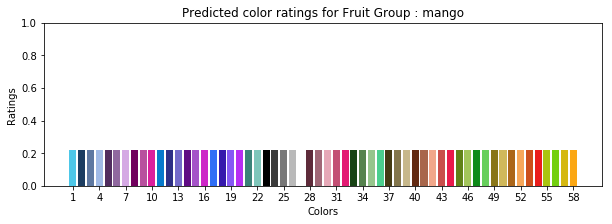

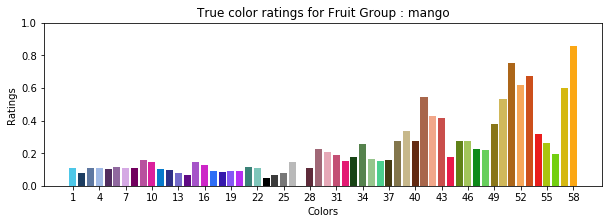

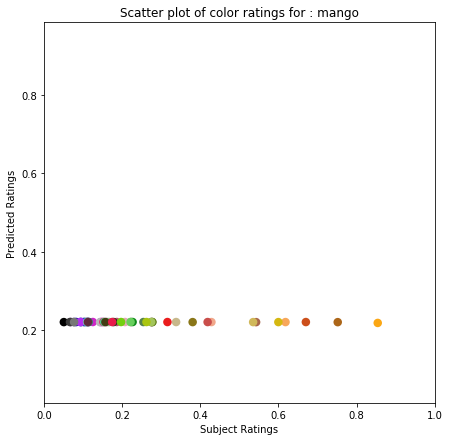

(2900, 2)
(2900,)
Score is : -0.05
Coefficients:  [ 0.21682625 -0.09314986]

Mean squared error: 0.0385
Variance score: -0.05
50.0
The true squared error (in color ratings) for left out fruit watermelon is: 2.2332

Pearson’s correlation coefficient (between true ratings and avg predicted ratings) is 0.0522
p-value 0.6969


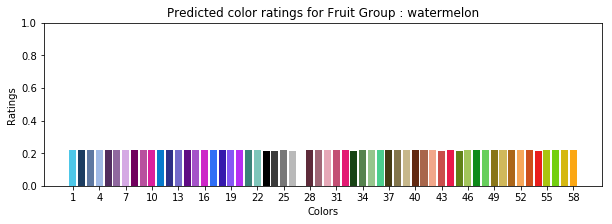

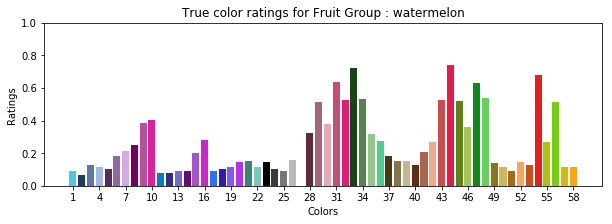

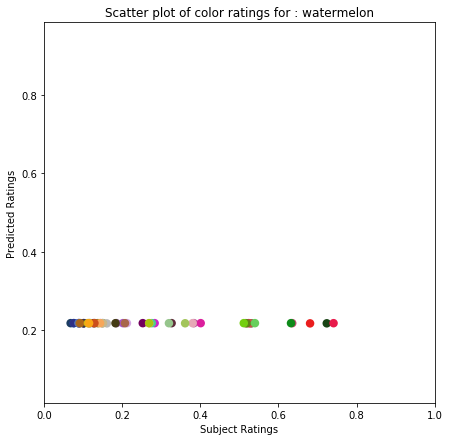

(2900, 2)
(2900,)
Score is : 0.00
Coefficients:  [ 0.22067296 -0.09765843]

Mean squared error: 0.0200
Variance score: 0.00
50.0
The true squared error (in color ratings) for left out fruit honeydew is: 1.1612

Pearson’s correlation coefficient (between true ratings and avg predicted ratings) is 0.0538
p-value 0.6884


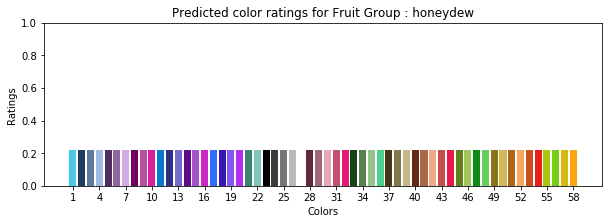

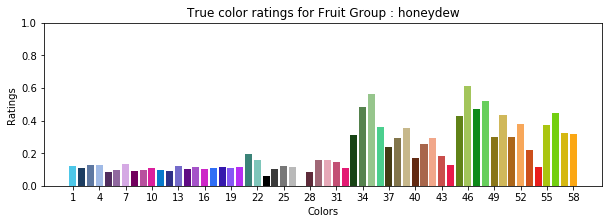

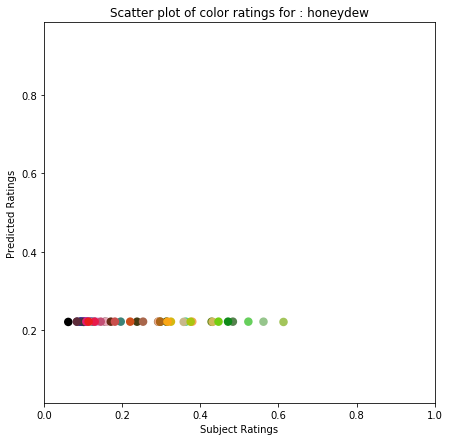

(2900, 2)
(2900,)
Score is : -0.00
Coefficients:  [ 0.21950077 -0.0951432 ]

Mean squared error: 0.0312
Variance score: -0.00
50.0
The true squared error (in color ratings) for left out fruit cantaloupe is: 1.8102

Pearson’s correlation coefficient (between true ratings and avg predicted ratings) is 0.0520
p-value 0.6983


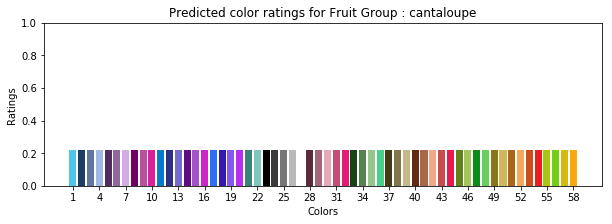

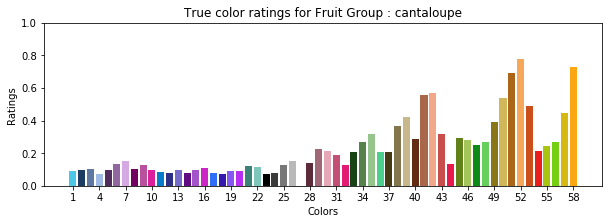

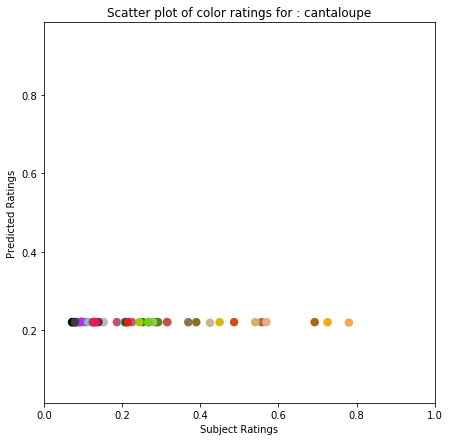

(2900, 2)
(2900,)
Score is : -0.02
Coefficients:  [ 0.21852464 -0.08855564]

Mean squared error: 0.0249
Variance score: -0.02
50.0
The true squared error (in color ratings) for left out fruit grapefruit is: 1.4427

Pearson’s correlation coefficient (between true ratings and avg predicted ratings) is 0.0939
p-value 0.4834


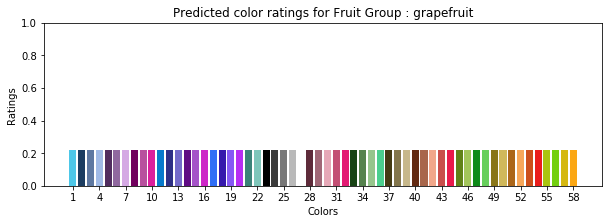

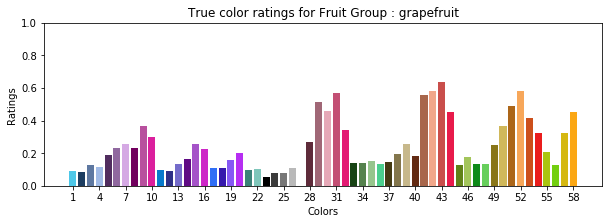

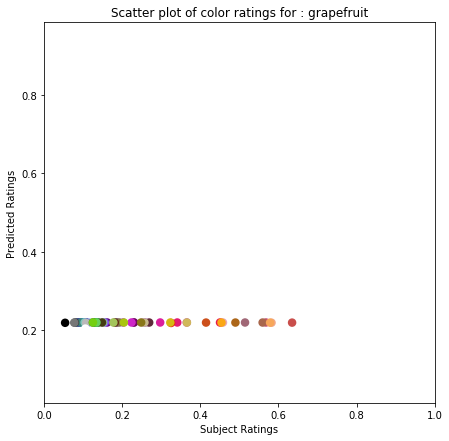

(2900, 2)
(2900,)
Score is : 0.00
Coefficients:  [ 0.22012607 -0.09445702]

Mean squared error: 0.0272
Variance score: 0.00
50.0
The true squared error (in color ratings) for left out fruit strawberry is: 1.5798

Pearson’s correlation coefficient (between true ratings and avg predicted ratings) is 0.0720
p-value 0.5914


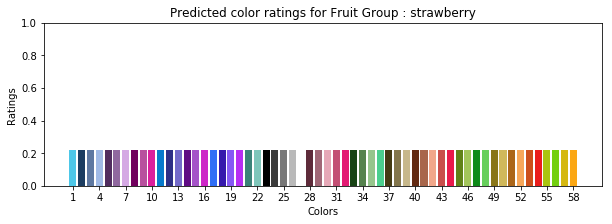

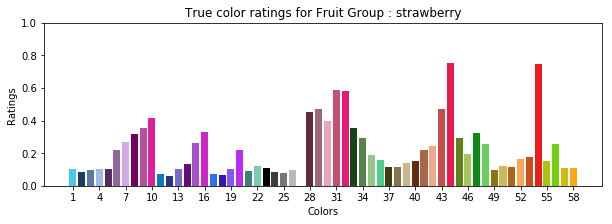

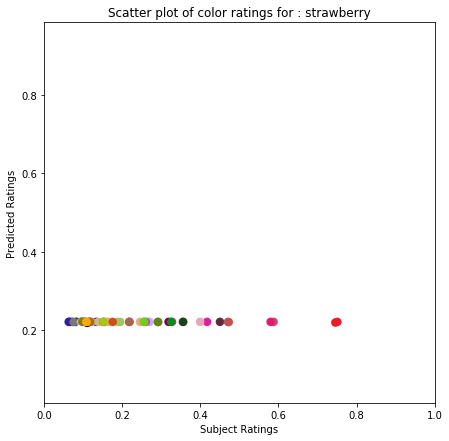

(2900, 2)
(2900,)
Score is : 0.00
Coefficients:  [ 0.22067341 -0.07853166]

Mean squared error: 0.0238
Variance score: 0.00
50.0
The true squared error (in color ratings) for left out fruit raspberry is: 1.3776

Pearson’s correlation coefficient (between true ratings and avg predicted ratings) is 0.1231
p-value 0.3574


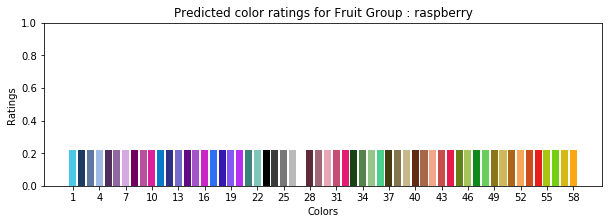

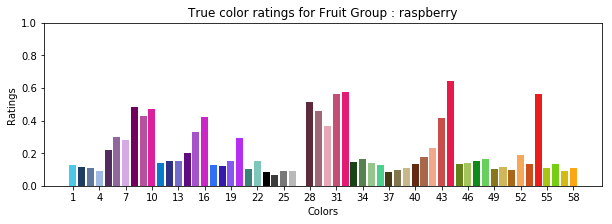

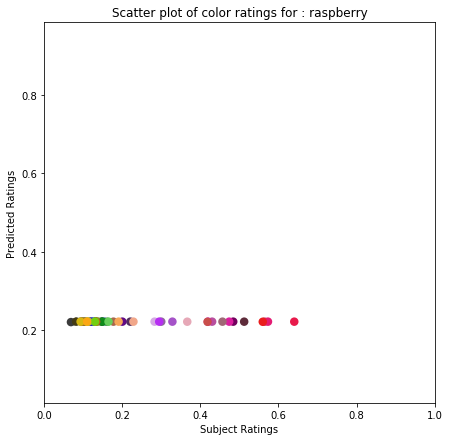

(2900, 2)
(2900,)
Score is : -0.00
Coefficients:  [ 0.22023233 -0.10233628]

Mean squared error: 0.0426
Variance score: -0.00
50.0
The true squared error (in color ratings) for left out fruit blueberry is: 2.4692

Pearson’s correlation coefficient (between true ratings and avg predicted ratings) is 0.0146
p-value 0.9135


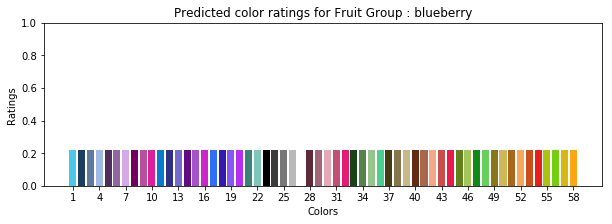

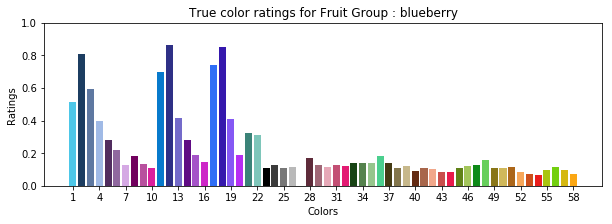

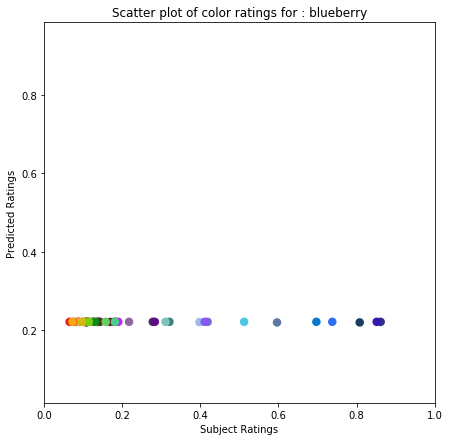

(2900, 2)
(2900,)
Score is : -0.01
Coefficients:  [ 0.22218304 -0.09453148]

Mean squared error: 0.0363
Variance score: -0.01
50.0
The true squared error (in color ratings) for left out fruit avocado is: 2.1023

Pearson’s correlation coefficient (between true ratings and avg predicted ratings) is 0.0618
p-value 0.6452


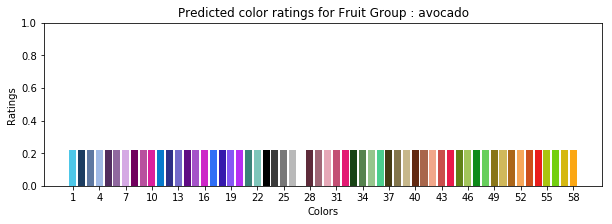

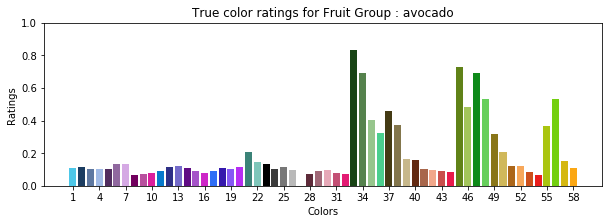

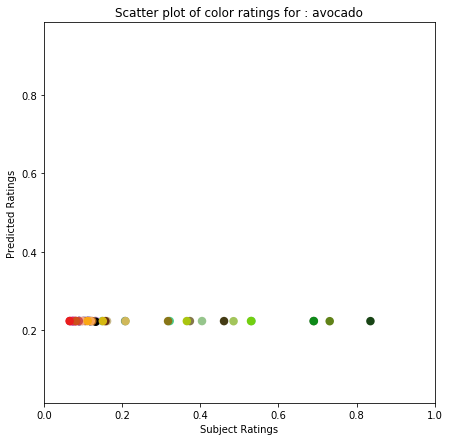

(2900, 2)
(2900,)
Score is : -0.01
Coefficients:  [ 0.22161527 -0.13262856]

Mean squared error: 0.0376
Variance score: -0.01
50.0
The true squared error (in color ratings) for left out fruit orange is: 2.1798

Pearson’s correlation coefficient (between true ratings and avg predicted ratings) is -0.1001
p-value 0.4548


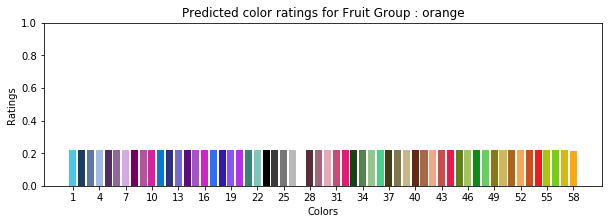

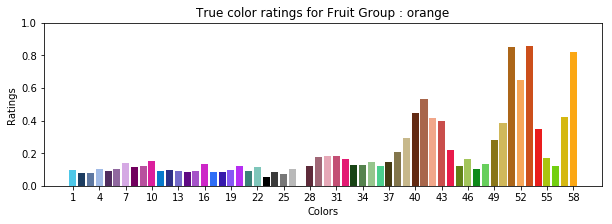

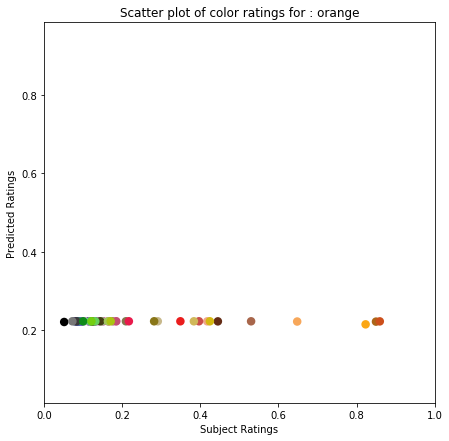

(2900, 2)
(2900,)
Score is : -0.01
Coefficients:  [ 0.22209056 -0.10445319]

Mean squared error: 0.0443
Variance score: -0.01
50.0
The true squared error (in color ratings) for left out fruit lime is: 2.5686

Pearson’s correlation coefficient (between true ratings and avg predicted ratings) is 0.0185
p-value 0.8902


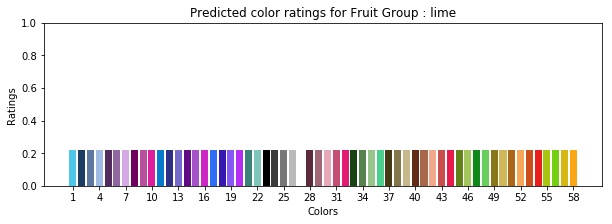

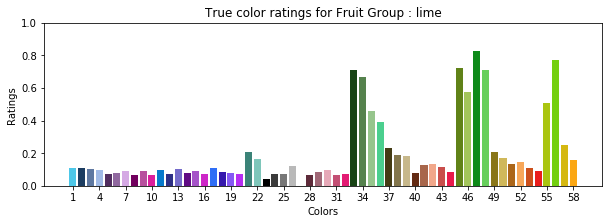

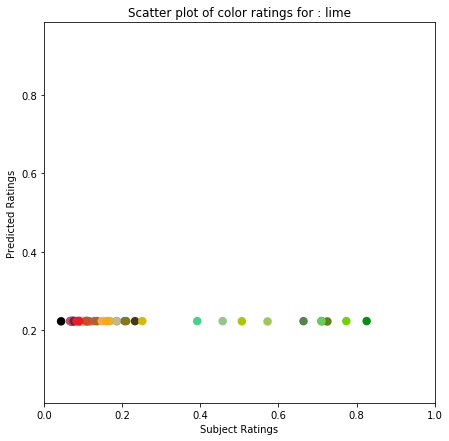

(2900, 2)
(2900,)
Score is : -0.04
Coefficients:  [ 0.22327938 -0.11336055]

Mean squared error: 0.0272
Variance score: -0.04
50.0
The true squared error (in color ratings) for left out fruit lemon is: 1.5744

Pearson’s correlation coefficient (between true ratings and avg predicted ratings) is -0.0222
p-value 0.8684


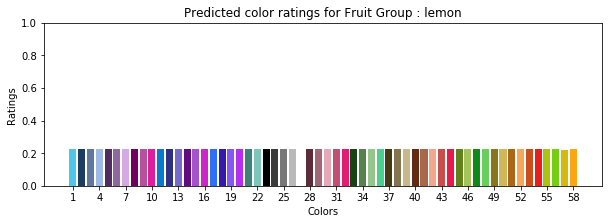

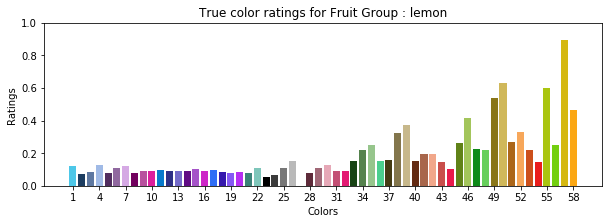

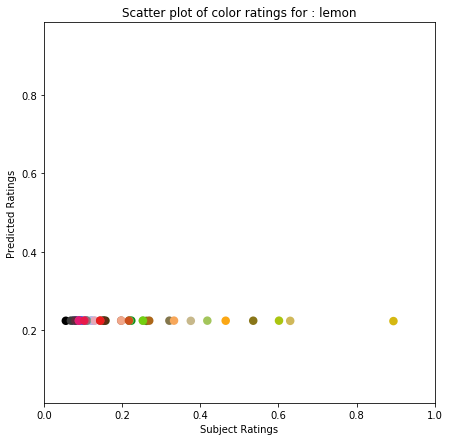

In [20]:
errNew, corrNew, win0_m, win1_m, win2_m = getRatings()

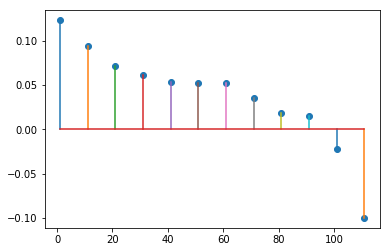

In [23]:
r1 = range(1,121,10)
mline1 = plt.stem(r1,sorted(corrNew)[::-1], linefmt='-',label='1 feature')
plt.show()